In [275]:
import numpy as np
import matplotlib.pyplot as plt

def newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000):
    #считаем первую итерацию для сравнения разницы с eps
    x1 = x0 - f(x0)/fder(x0)
    #score будет считать итерации
    score = 1
    while score < maxiter and abs(x1 - x0) > eps:
        x0 = x1
        x1 = x0 - f(x0)/fder(x0)
        score += 1
    return x1, score

In [276]:
def F1(x):
    return x**2 - 1
def dF1(x):
    return 2*x

In [277]:
newton_iteration(F1, dF1, 2)

(1.000000000000001, 5)

In [278]:
#для нахождения степени корня на вход будет поступать функция и массив производных
def newton_iteration2(f, fder, x0, eps=1e-5, maxiter=1000):
    #m это количество корней
    m = 1
    #это часть определяет итерацию, за циклом снова нужна чтобы потом легко сравнивать
    if fder(x0)[0] == 0:
        for i in range(1, len(fder(1))):
            if fder(x0)[i] != 0:
                m = i
        x1 = x0 - m * fder(x0)[m-1]/fder(x0)[m]
    else:
        x1 = x0 - f(x0)/fder(x0)[0]
    #счетчик итераций
    score = 1
    
    while score < maxiter and abs(x1 - x0) > eps:
        x0 = x1
        m = 1
        
        if fder(x0)[0] == 0:
            for i in range(1, len(fder(1))):
                if fder(x0)[i] != 0:
                    m = i
            x1 = x0 - m * fder(x0)[m-1]/fder(x0)[m]
        else:
            x1 = x0 - f(x0)/fder(x0)[0]
            
        score += 1
        
    return x1, m + 1, score

In [279]:
def F2(x):
    return (x**2-1)**2
def dF2(x):
    return [4*(x**2-1)*x, 12*x**2 - 4, 24*x, 24]

In [280]:
print(newton_iteration2(F2, dF2, 4))

(1.000006541053994, 2, 21)


In [281]:
def F3(x):
    return -np.cos(x) + x**0.5
def dF3(x):
    return np.sin(x) + 0.5*x**(-0.5)

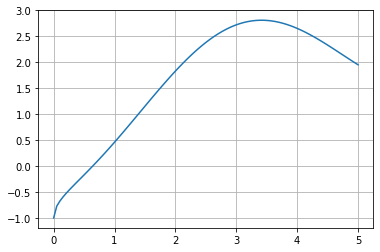

In [299]:
plt.figure()

x = np.linspace(0, 5, 100)
plt.grid()

#график на интервале x от функции F3
plt.plot(x, F3(x))

plt.show()

In [300]:
print(newton_iteration(F3, dF3, 1))

(0.6417143708728826, 4)


In [301]:
#другой способ с a 
def newton_iteration_a(f, a, x0, eps=1e-5, maxiter=100):
    x1 = x0 - f(x0) * a
    score = 1
    while score < maxiter and abs(x1 - x0) > eps:
        x0 = x1
        x1 = x0 - f(x0) * a
        score += 1
    return x1, score

In [308]:
#a считаем отдельно так как можем задать любое
m = min(abs(dF3(x[1:])))
M = max(abs(dF3(x[1:])))
#это нужно чтобы приближениие было возможно
if m < 1:
    m = 1

a = 2 / (m + M)
print(newton_iteration_a(F3, a, 0.1))

(0.6417120776232991, 9)


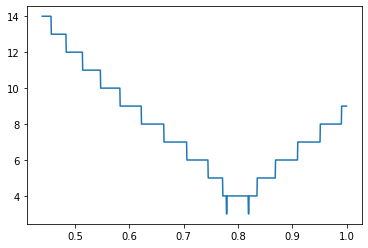

In [310]:
a_x = np.linspace(1 / M, 1 / m, 1000) #это от минимального  возможного коэффициента наклона до максиамального a


plt.figure()
plt.plot(a_x, [newton_iteration_a(F3, i, 1)[1] for i in a_x])
plt.show()

In [328]:
from scipy import optimize

def Fractal(x_min, x_max, y_min, y_max, f, roots, colors, eps = 1e-5):
    #разбиваем заданный интервал на 2500 точек и смотрим их сходимость (можно поставить больше но ждать надоедает)
    x = np.linspace(x_min, x_max, 50)
    y = np.linspace(y_min, y_max, 50)
    
    plt.figure()
    #пробегаем все точки, обсчитываем каждую
    for i in x:
        for j in y:
            
            r = optimize.root(f, i + j*1j, method = 'krylov', tol = eps)
            # мы изначально задаем точки к которым может придти функция (roots) и цвета в которые хотим покрасить каждый из корней (colors)
            for n in range(len(roots)):
                if abs(r.x - roots[n]) <= 2*eps: #здесь мы определяем к которому корню ближе
                    plt.plot(i, j, 'o', color = colors[n])
                    
    plt.show()

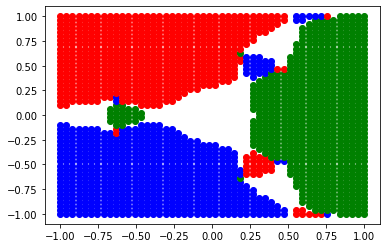

In [331]:
def fun(x):
    return (x+0j)**3-1

roots = [1, np.exp(2j/3*np.pi), np.exp(4j/3*np.pi)] #корни
colors = ['g', 'red', 'b'] #цвета в которые красят корни

Fractal(-1,1,-1,1, fun, roots, colors) 

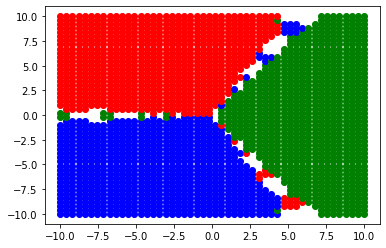

In [332]:
Fractal(-10,10,-10,10, fun, roots, colors) 